Code below is for section 5.2 

QUESTION: do you want me to interpolate for missing data or not?

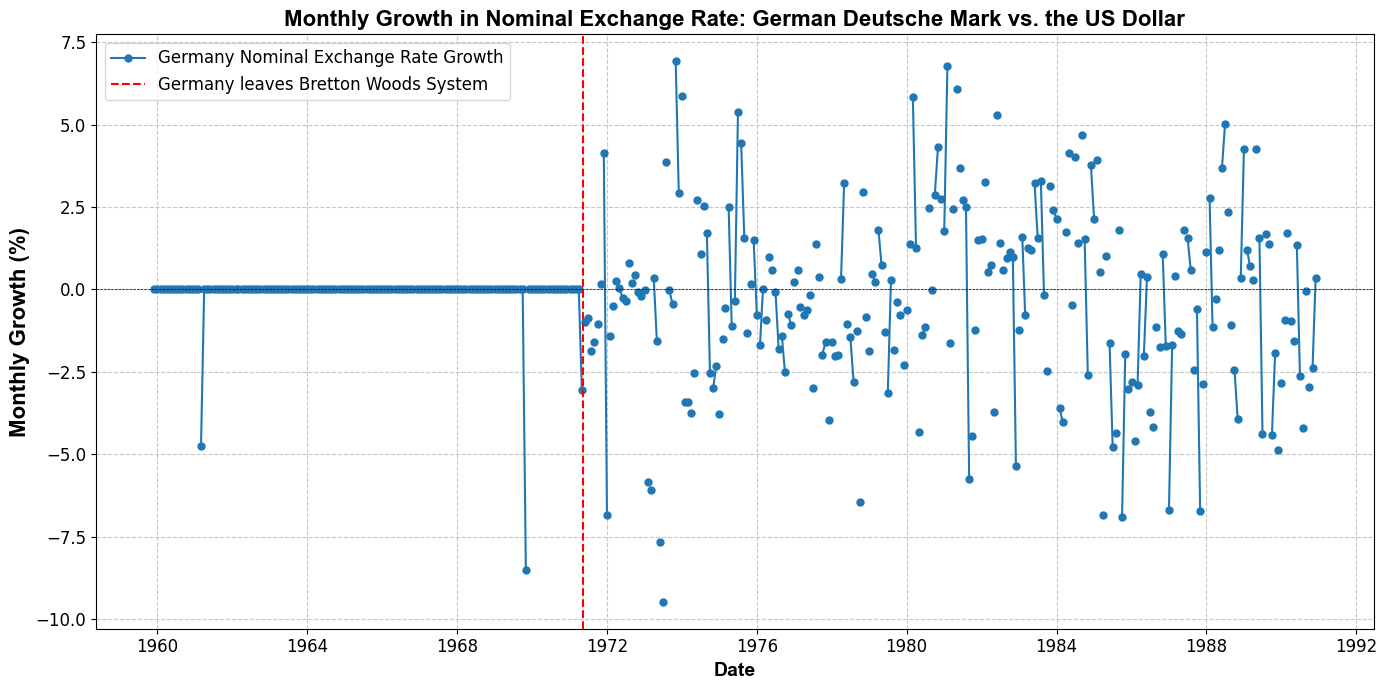

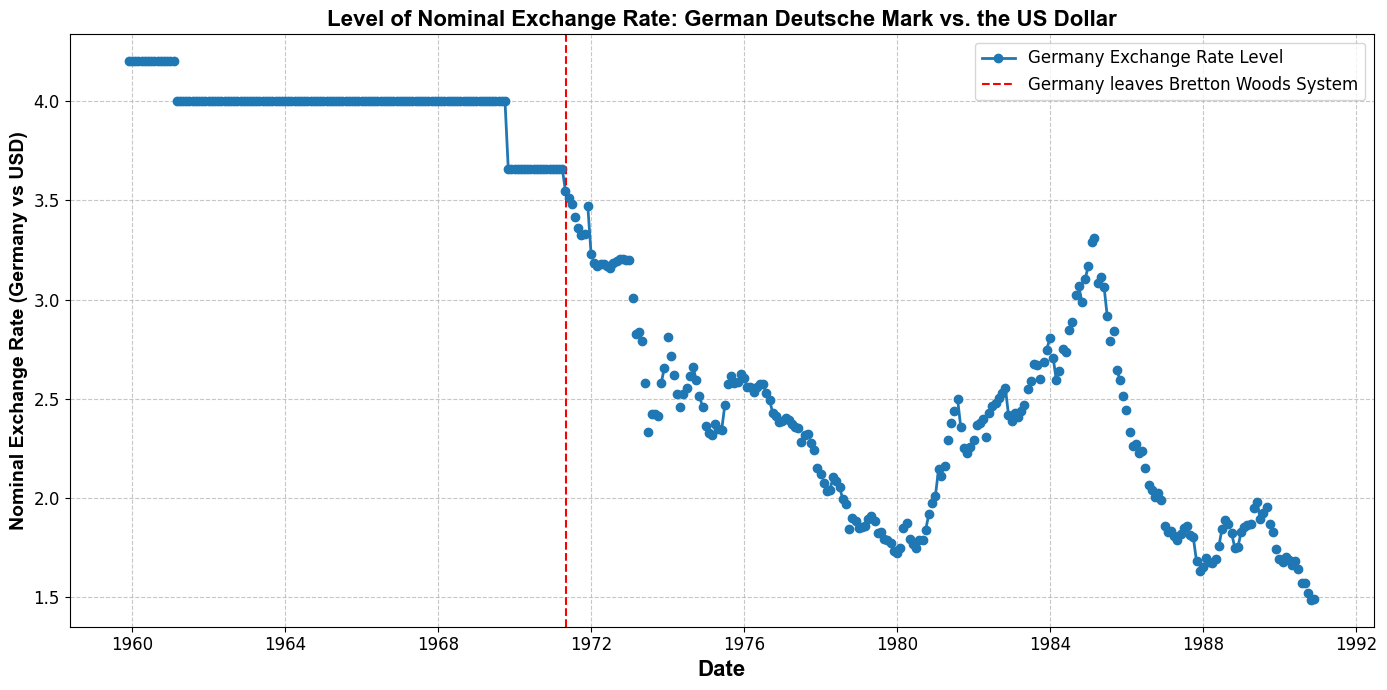

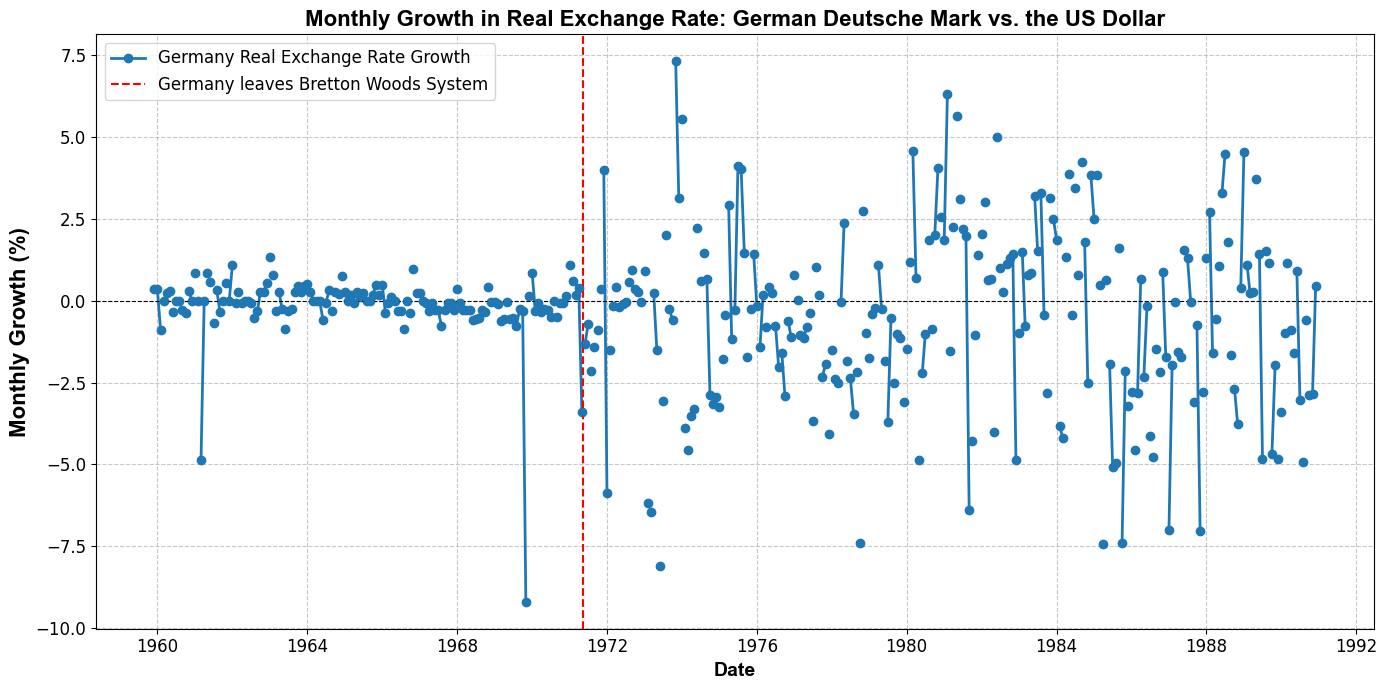

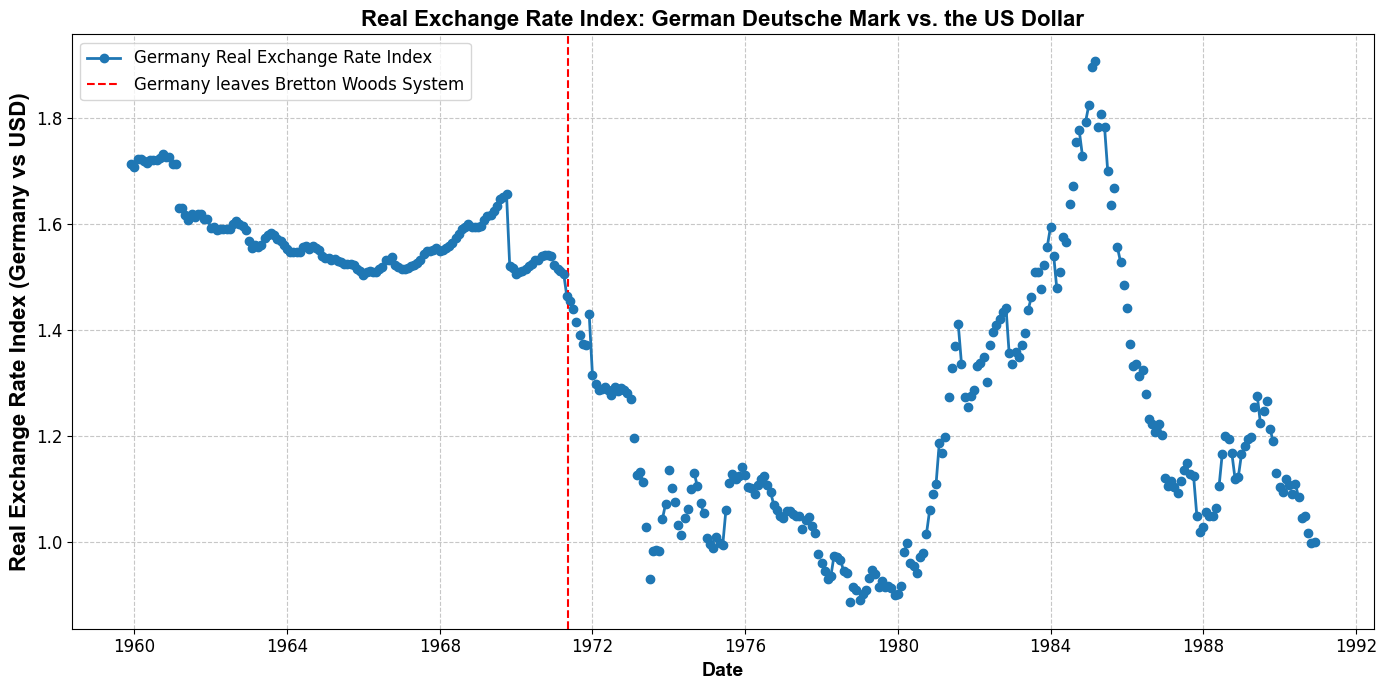

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Sort the data by Time
df = df.sort_values(by="Time")

# Graph 1: Monthly Growth in Nominal Exchange Rate
germany_growth_column = "German Nominal EX Rate Growth"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[germany_growth_column], label="Germany Nominal Exchange Rate Growth", marker="o", linestyle="-", color="#1f77b4", markersize=5)
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Monthly Growth (%)", fontsize=16, fontweight='bold', family='Arial')
plt.title("Monthly Growth in Nominal Exchange Rate: German Deutsche Mark vs. the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Graph 2: Level of Nominal Exchange Rate
nominal_exchange_rate_column = "Nominal Exchange Rate"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[nominal_exchange_rate_column], label="Germany Exchange Rate Level", color="#1f77b4", linewidth=2, marker="o")
plt.scatter(df["Time"], df[nominal_exchange_rate_column], color="#1f77b4", s=25, zorder=5)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=16, fontweight='bold', family='Arial')
plt.ylabel("Nominal Exchange Rate (Germany vs USD)", fontsize=14, fontweight='bold', family='Arial')
plt.title("Level of Nominal Exchange Rate: German Deutsche Mark vs. the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Graph 3: Monthly Growth in Real Exchange Rate
germany_real_growth_column = "German Real EX Rate Growth"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[germany_real_growth_column], label="Germany Real Exchange Rate Growth", color="#1f77b4", linewidth=2 , marker="o")
plt.scatter(df["Time"], df[germany_real_growth_column], color="#1f77b4", s=25, zorder=5, marker="o")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Monthly Growth (%)", fontsize=16, fontweight='bold', family='Arial')
plt.title("Monthly Growth in Real Exchange Rate: German Deutsche Mark vs. the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()


# Graph 4: Real Exchange Rate Index
real_exchange_rate_index_column = "German Real EX Rate Index"
plt.figure(figsize=(14, 7))
plt.plot(df["Time"], df[real_exchange_rate_index_column], label="Germany Real Exchange Rate Index", color="#1f77b4", linewidth=2, marker="o")
plt.scatter(df["Time"], df[real_exchange_rate_index_column], color="#1f77b4", s=25, zorder=5)
plt.axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods System")
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Real Exchange Rate Index (Germany vs USD)", fontsize=16, fontweight='bold', family='Arial')
plt.title("Real Exchange Rate Index: German Deutsche Mark vs. the US Dollar", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Show all plots
plt.show()


Plot time series graphs of the monthly indexed value of international reserves for your country and the US from January 1960 until the exit of the US from Bretton Woods.

- Was the US dollar over or undervalued in the Bretton Woods system? Refer to data or figures in your answer. 
- Using your above figures, explain one reason for the US’s departure from the Bretton Woods system.

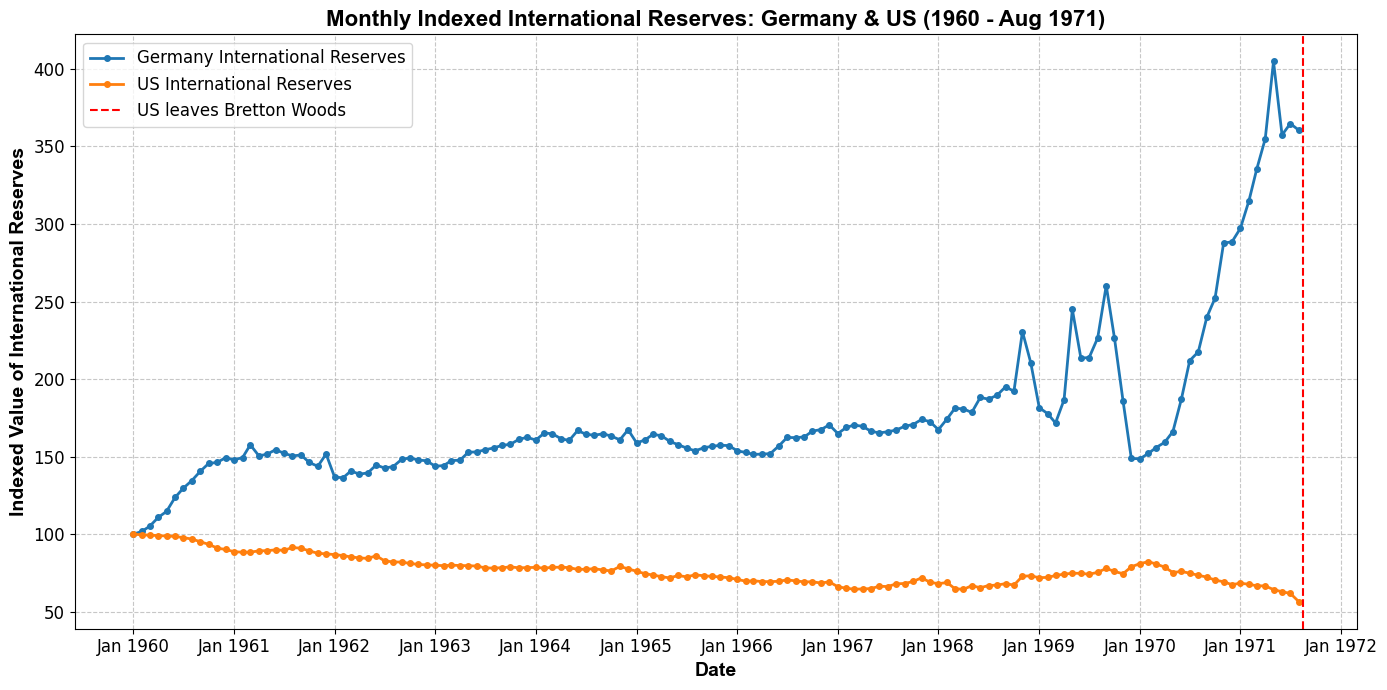

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df = pd.read_excel("../data/final_df.xlsx")

df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

df = df[(df["Time"] >= "1960-01-01") & (df["Time"] <= "1971-08-15")]

df["Country"] = df["Country"].str.strip()
df_germany = df[df["Country"] == "Germany"]
df_us = df[df["Country"].isin(["US", "United States", "USA"])]  # Handle variations

reserves_column = "International Reserves Index"

plt.figure(figsize=(14, 7))

# Plot Germany's indexed international reserves
if not df_germany.empty:
    plt.plot(df_germany["Time"], df_germany[reserves_column], label="Germany International Reserves",
             color="#1f77b4", linewidth=2, marker="o", markersize=4)

# Plot US indexed international reserves
if not df_us.empty:
    plt.plot(df_us["Time"], df_us[reserves_column], label="US International Reserves",
             color="#ff7f0e", linewidth=2, marker="o", markersize=4)

# Add vertical red line marking US exit from Bretton Woods (Aug 15, 1971)
plt.axvline(pd.to_datetime("1971-08-15"), color="red", linestyle="--", linewidth=1.5, label="US leaves Bretton Woods")


plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
#plt.xticks(rotation=45, ha="right")  # Rotate labels for readability

# Graph formatting
plt.xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Indexed Value of International Reserves", fontsize=14, fontweight='bold', family='Arial')
plt.title("Monthly Indexed International Reserves: Germany & US (1960 - Aug 1971)", fontsize=16, fontweight='bold', family='Arial')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout() #spacing is better with this


plt.show()


Was the US dollar over or undervalued in the Bretton Woods system? Refer to data or figures in your answer.

Using your above figures, explain one reason for the US’s departure from the Bretton Woods system.


Section 5.2.2 - Inflation and Industrial Production Graphs

INFLATION GRAPHS

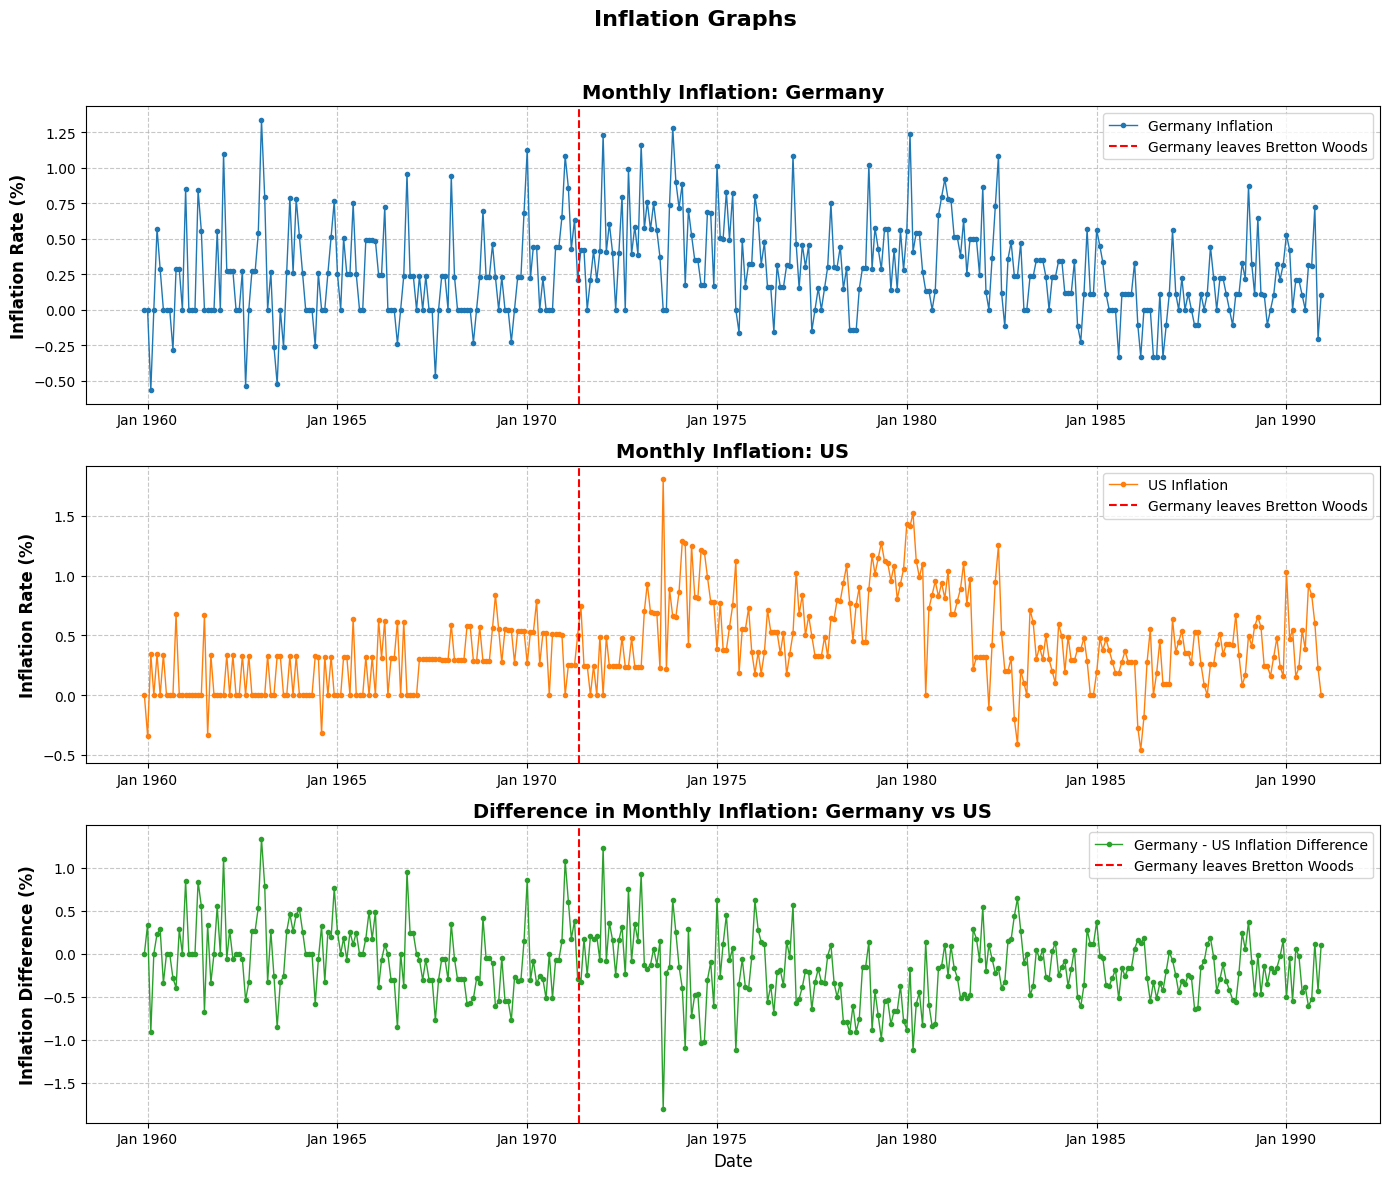

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Standardize country names if needed
df["Country"] = df["Country"].str.strip()  # Remove accidental spaces

# Filter out the data for Germany and US
df_germany = df[df["Country"] == "Germany"]
df_us = df[df["Country"].isin(["US", "United States", "USA"])]  # Handle alternative labels

# Define the column for monthly inflation
inflation_column = "Inflation Rate"

# Create the figure and axes for the plots
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=False)

# Plot Germany's monthly inflation
axs[0].plot(df_germany["Time"], df_germany[inflation_column], label="Germany Inflation", color="#1f77b4", linewidth=1, marker="o", markersize=3)
axs[0].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")
axs[0].set_ylabel("Inflation Rate (%)", fontsize=12, fontweight='bold')
axs[0].set_title("Monthly Inflation: Germany", fontsize=14, fontweight='bold')
axs[0].grid(True, linestyle="--", alpha=0.7)
axs[0].legend(loc='upper right', fontsize=10)

# Plot US's monthly inflation
axs[1].plot(df_us["Time"], df_us[inflation_column], label="US Inflation", color="#ff7f0e", linewidth=1, marker="o", markersize=3)  # Changed marker
axs[1].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")
axs[1].set_ylabel("Inflation Rate (%)", fontsize=12, fontweight='bold')
axs[1].set_title("Monthly Inflation: US", fontsize=14, fontweight='bold')
axs[1].grid(True, linestyle="--", alpha=0.7)
axs[1].legend(loc='upper right', fontsize=10)

# Plot the difference between Germany and US inflation
df_diff_inflation = df_germany.merge(df_us, on="Time", suffixes=('_Germany', '_US'))
df_diff_inflation["Inflation Difference"] = df_diff_inflation[inflation_column + "_Germany"] - df_diff_inflation[inflation_column + "_US"]

axs[2].plot(df_diff_inflation["Time"], df_diff_inflation["Inflation Difference"], label="Germany - US Inflation Difference", color="#2ca02c", linewidth=1, marker="o", markersize=3)  # Changed marker
axs[2].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")
axs[2].set_xlabel("Date", fontsize=12)
axs[2].set_ylabel("Inflation Difference (%)", fontsize=12, fontweight='bold')
axs[2].set_title("Difference in Monthly Inflation: Germany vs US", fontsize=14, fontweight='bold')
axs[2].grid(True, linestyle="--", alpha=0.7)
axs[2].legend(loc='upper right', fontsize=10)

# Formatting x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Set major ticks to show every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format date as 'Month Year'
    #ax.tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-tick labels for readability

# Add overall title for the inflation section
fig.suptitle("Inflation Graphs", fontsize=16, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


Industrial Production Graps 
- CHECK WITH JOSH/MATT ABOUT SECOND GRAPH IN THIS

/var/folders/7g/lmj_b9394knf5s164whgfq900000gn/T/ipykernel_67661/397690395.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_germany["YoY IP Growth"] = df_germany[monthly_growth_col].pct_change(periods=12) * 100  # Convert to percentage


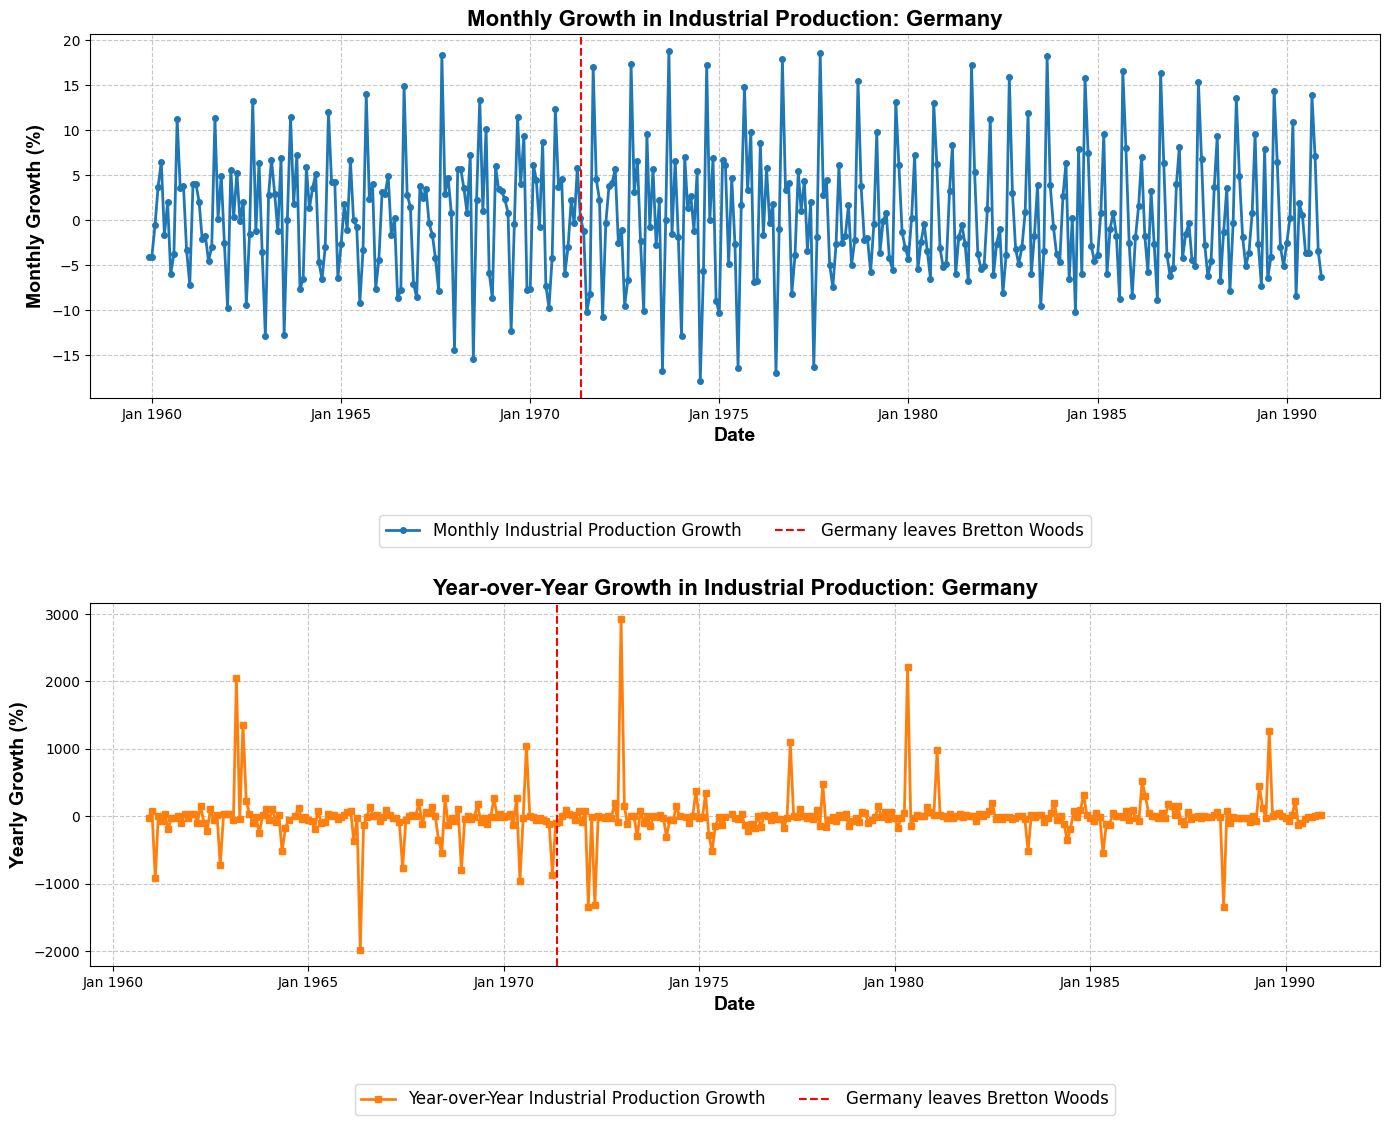

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Filter the data for Germany
df_germany = df[df["Country"] == "Germany"]

# Define the columns
monthly_growth_col = "German Monthly IP Growth"

# Calculate Year-over-Year (YoY) Growth
df_germany["YoY IP Growth"] = df_germany[monthly_growth_col].pct_change(periods=12) * 100  # Convert to percentage

# Create figure with two separate subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=False)

# ---- Plot 1: Monthly Growth in Industrial Production ----
axes[0].plot(df_germany["Time"], df_germany[monthly_growth_col], label="Monthly Industrial Production Growth", 
             color="#1f77b4", linewidth=2, marker="o", markersize=4)

axes[0].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")

axes[0].set_xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
axes[0].set_ylabel("Monthly Growth (%)", fontsize=14, fontweight='bold', family='Arial')
axes[0].set_title("Monthly Growth in Industrial Production: Germany", fontsize=16, fontweight='bold', family='Arial')

axes[0].grid(True, linestyle="--", alpha=0.7)
axes[0].xaxis.set_major_locator(mdates.YearLocator(5))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Legend below the first graph
axes[0].legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# ---- Plot 2: Year-over-Year Growth in Industrial Production ----
axes[1].plot(df_germany["Time"], df_germany["YoY IP Growth"], label="Year-over-Year Industrial Production Growth", 
             color="#ff7f0e", linewidth=2, marker="s", markersize=4)

axes[1].axvline(pd.to_datetime("1971-05-10"), color="red", linestyle="--", linewidth=1.5, label="Germany leaves Bretton Woods")

axes[1].set_xlabel("Date", fontsize=14, fontweight='bold', family='Arial')
axes[1].set_ylabel("Yearly Growth (%)", fontsize=14, fontweight='bold', family='Arial')
axes[1].set_title("Year-over-Year Growth in Industrial Production: Germany", fontsize=16, fontweight='bold', family='Arial')

axes[1].grid(True, linestyle="--", alpha=0.7)
axes[1].xaxis.set_major_locator(mdates.YearLocator(5))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Legend below the second graph
axes[1].legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


5.2.3 Comparison Statistics & Visualisation

In [7]:
import pandas as pd  # Make sure to import pandas

# Define the date of Bretton Woods exit
bretton_woods_exit = pd.to_datetime("1971-08-15")

# Define the end date for the before period and the start date for the after period
before_bretton_woods_end = pd.to_datetime("1971-06-30")  # Data up to June 1971
after_bretton_woods_start = pd.to_datetime("1973-03-01")  # Data from March 1973

# Filter data for before and after Bretton Woods for Germany
df_before_bw = df_germany[(df_germany["Time"] < bretton_woods_exit) & (df_germany["Time"] <= before_bretton_woods_end)]
df_after_bw = df_germany[(df_germany["Time"] >= after_bretton_woods_start) & (df_germany["Time"] >= bretton_woods_exit)]

# List of columns to calculate standard deviation
columns = [
    "German Nominal EX Rate Growth",   # Monthly growth of the nominal exchange rate
    "German Real EX Rate Growth",      # Monthly growth of the real exchange rate
    "Inflation Rate",                  # Inflation rate in Germany
    "Inflation Difference",            # Difference between Germany and US inflation
    "German Monthly IP Growth"         # 12-monthly industrial production growth
]

# Function to calculate standard deviation and ratio
def calc_std_and_ratio(df_before, df_after, columns):
    std_values = {}
    for column in columns:
        # Check if the column exists in the DataFrame
        if column not in df_before.columns or column not in df_after.columns:
            print(f"Column {column} is missing in the data.")
            continue
        
        # Calculate standard deviation before and after Bretton Woods
        std_before = df_before[column].std()
        std_after = df_after[column].std()

        # Calculate the ratio (avoid division by zero)
        ratio = std_before / std_after if std_after != 0 else float('inf')
        
        # Map the columns to custom names for clarity
        column_names_map = {
            "German Nominal EX Rate Growth": "Germany Monthly Nominal ER Growth vs US Dollar",
            "German Real EX Rate Growth": "Germany Monthly Real ER Growth vs US Dollar",
            "Inflation Rate": "Inflation Rate in Germany",
            "Inflation Difference": "Inflation Difference (Germany vs US)",
            "German Monthly IP Growth": "12-Monthly Industrial Production Growth (Germany)"
        }

        custom_column_name = column_names_map.get(column, column)

        std_values[custom_column_name] = {
            'Std Before Bretton Woods': std_before,
            'Std After Bretton Woods': std_after,
            'Ratio Before/After': ratio
        }
    
    # Convert the dictionary to a DataFrame for better presentation
    std_df = pd.DataFrame(std_values).T
    return std_df

# Calculate standard deviation and ratios for the selected columns
std_table = calc_std_and_ratio(df_before_bw, df_after_bw, columns)

# Display the result in a formatted table
print("\nStandard Deviation Table:\n", std_table)


Column Inflation Difference is missing in the data.

Standard Deviation Table:
                                                    Std Before Bretton Woods  \
Germany Monthly Nominal ER Growth vs US Dollar                     0.864196   
Germany Monthly Real ER Growth vs US Dollar                        1.014880   
Inflation Rate in Germany                                          0.341466   
12-Monthly Industrial Production Growth (Germany)                  6.422025   

                                                   Std After Bretton Woods  \
Germany Monthly Nominal ER Growth vs US Dollar                    2.879368   
Germany Monthly Real ER Growth vs US Dollar                       2.824467   
Inflation Rate in Germany                                         0.306777   
12-Monthly Industrial Production Growth (Germany)                 7.239736   

                                                   Ratio Before/After  
Germany Monthly Nominal ER Growth vs US Dollar               

Whymight it be a good idea to exclude data from 07/1971- 02/1973 for the above calculations?

Column Inflation Difference is missing in the data.


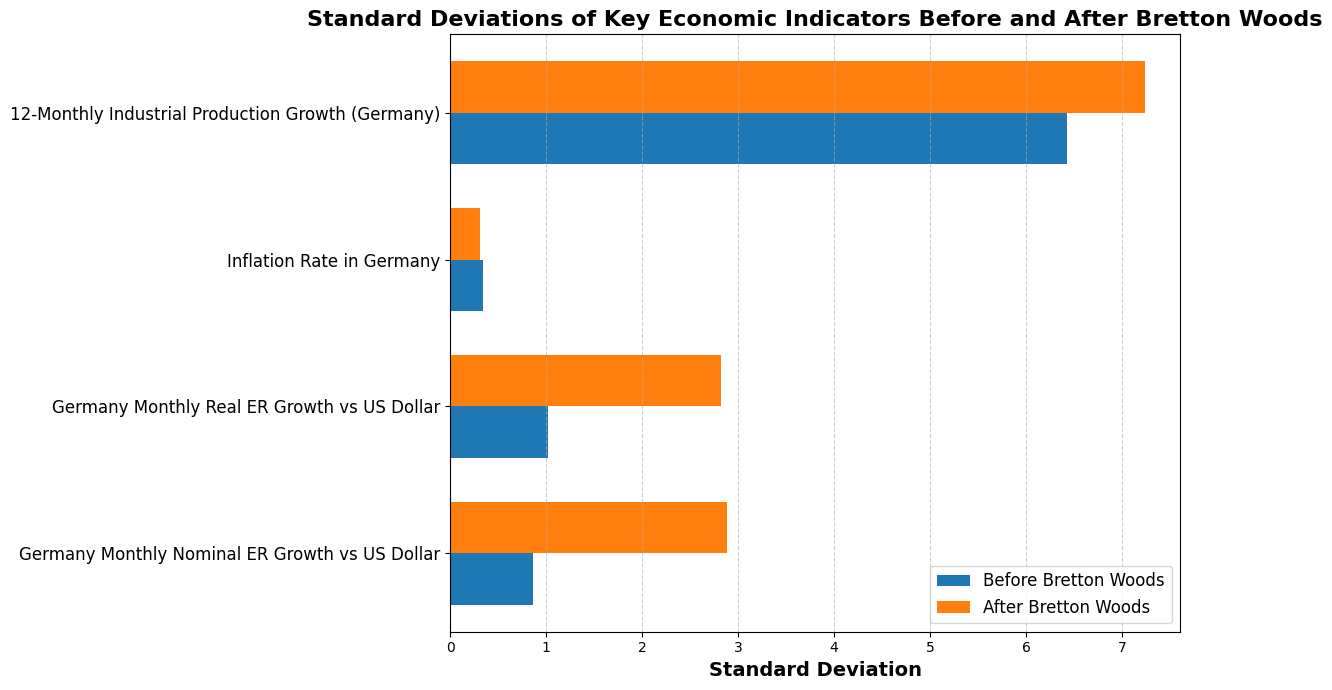

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Define the date of Bretton Woods exit
bretton_woods_exit = pd.to_datetime("1971-08-15")

# Define the end date for the before period and the start date for the after period
before_bretton_woods_end = pd.to_datetime("1971-06-30")  # Data up to June 1971
after_bretton_woods_start = pd.to_datetime("1973-03-01")  # Data from March 1973

# Filter data for before and after Bretton Woods for Germany
df_before_bw = df_germany[(df_germany["Time"] < bretton_woods_exit) & (df_germany["Time"] <= before_bretton_woods_end)]
df_after_bw = df_germany[(df_germany["Time"] >= after_bretton_woods_start) & (df_germany["Time"] >= bretton_woods_exit)]

# List of columns to calculate standard deviation
columns = [
    "German Nominal EX Rate Growth",   # Monthly growth of the nominal exchange rate
    "German Real EX Rate Growth",      # Monthly growth of the real exchange rate
    "Inflation Rate",                  # Inflation rate in Germany
    "Inflation Difference",            # Difference between Germany and US inflation
    "German Monthly IP Growth"         # 12-monthly industrial production growth
]

# Function to calculate standard deviation and ratio
def calc_std_and_ratio(df_before, df_after, columns):
    std_values = {}
    for column in columns:
        # Check if the column exists in the DataFrame
        if column not in df_before.columns or column not in df_after.columns:
            print(f"Column {column} is missing in the data.")
            continue
        
        # Calculate standard deviation before and after Bretton Woods
        std_before = df_before[column].std()
        std_after = df_after[column].std()

        # Calculate the ratio (avoid division by zero)
        ratio = std_before / std_after if std_after != 0 else float('inf')
        
        # Map the columns to custom names for clarity
        column_names_map = {
            "German Nominal EX Rate Growth": "Germany Monthly Nominal ER Growth vs US Dollar",
            "German Real EX Rate Growth": "Germany Monthly Real ER Growth vs US Dollar",
            "Inflation Rate": "Inflation Rate in Germany",
            "Inflation Difference": "Inflation Difference (Germany vs US)",
            "German Monthly IP Growth": "12-Monthly Industrial Production Growth (Germany)"
        }

        custom_column_name = column_names_map.get(column, column)

        std_values[custom_column_name] = {
            'Std Before Bretton Woods': std_before,
            'Std After Bretton Woods': std_after,
            'Ratio Before/After': ratio
        }
    
    # Convert the dictionary to a DataFrame for better presentation
    std_df = pd.DataFrame(std_values).T
    return std_df

# Calculate standard deviation and ratios for the selected columns
std_table = calc_std_and_ratio(df_before_bw, df_after_bw, columns)

# Plot the standard deviation data
# Extracting the standard deviations for plotting
std_before = std_table['Std Before Bretton Woods']
std_after = std_table['Std After Bretton Woods']

# Create side-by-side bars
fig, ax = plt.subplots(figsize=(12, 7))

# Define the positions for the bars (for side-by-side bars)
index = range(len(std_table))  # Create index for each variable
bar_width = 0.35  # Bar width for side-by-side bars

# Plot bars for before and after standard deviations
ax.barh([i - bar_width/2 for i in index], std_before, bar_width, label='Before Bretton Woods', color='#1f77b4')  # Blue color
ax.barh([i + bar_width/2 for i in index], std_after, bar_width, label='After Bretton Woods', color='#ff7f0e')  # Orange color

# Adding labels and title
ax.set_xlabel('Standard Deviation', fontsize=14, fontweight='bold')
ax.set_title('Standard Deviations of Key Economic Indicators Before and After Bretton Woods', fontsize=16, fontweight='bold')

# Enhancing y-axis labels with more clarity
ax.set_yticks(index)
ax.set_yticklabels(std_table.index, fontsize=12)

# Adding gridlines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.6)



# Adding a legend
ax.legend(loc='lower right', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


Ask about colours, font, need data values on bar?

/var/folders/7g/lmj_b9394knf5s164whgfq900000gn/T/ipykernel_67661/426658555.py:60: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly_std = df_filtered.resample('Y', on='Time')[column].std()


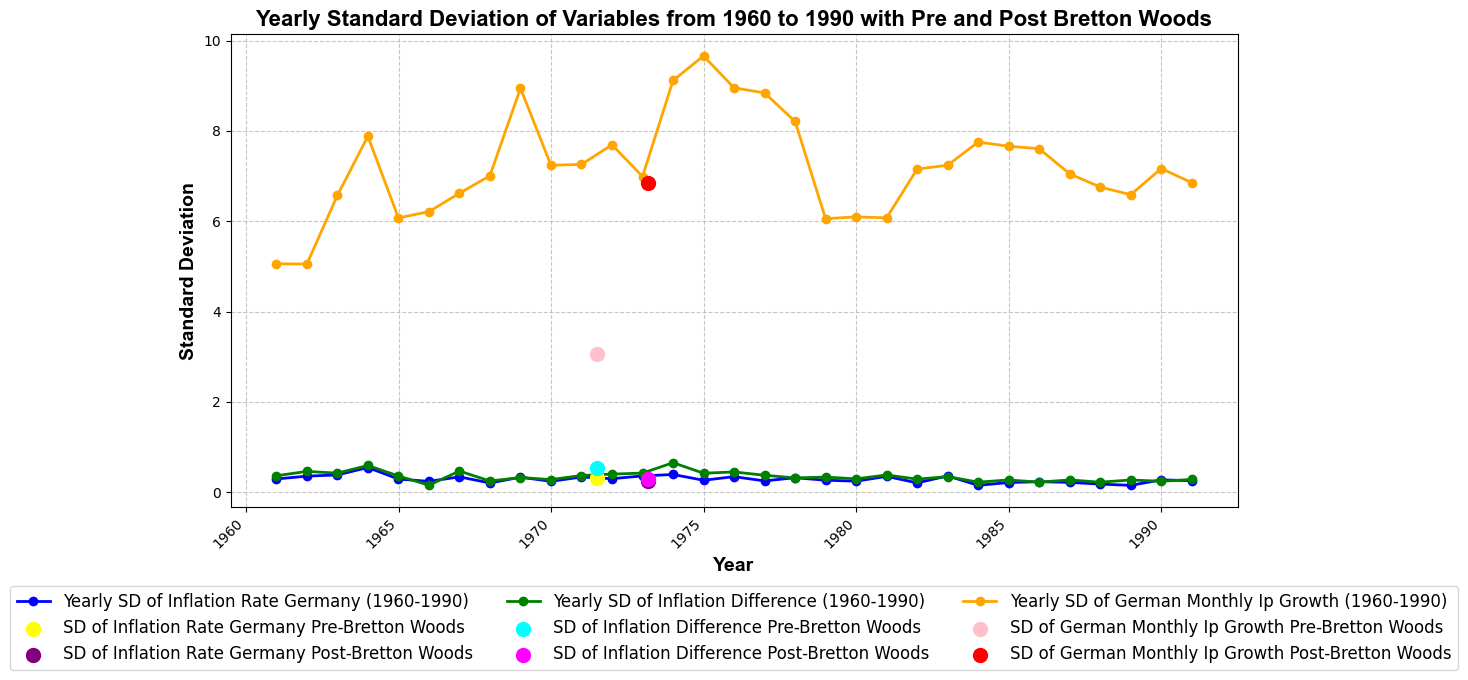


Standard Deviation Table:
                                                    Std (1960-1990)
Inflation Rate in Germany                                 0.326807
Inflation Difference (Germany vs US)                      0.409359
12-Monthly Industrial Production Growth (Germany)         7.003215


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_excel("../data/final_df.xlsx")

# Convert the 'Time' column to datetime format
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Strip any leading or trailing spaces from the 'Country' column
df["Country"] = df["Country"].str.strip()

# Filter the data for Germany and US
df_germany = df[df["Country"] == "Germany"]
df_us = df[df["Country"].isin(["US", "United States", "USA"])]  # Handle variations

# Calculate the Inflation Difference between Germany and the US
df_germany = df_germany.merge(df_us[["Time", "Inflation Rate"]], on="Time", suffixes=("_Germany", "_US"))
df_germany["Inflation Difference"] = df_germany["Inflation Rate_Germany"] - df_germany["Inflation Rate_US"]

# Define the start and end years for the full period (1960-1990)
start_date = pd.to_datetime("1960-01-01")
end_date = pd.to_datetime("1990-12-31")

# Define the dates for pre and post Bretton Woods
pre_bretton_woods_end = pd.to_datetime("1971-06-30")  # Pre-Bretton Woods period ends in June 1971
post_bretton_woods_start = pd.to_datetime("1973-03-01")  # Post-Bretton Woods period starts in March 1973

# Filter data for the full period (1960-1990)
df_full_period = df_germany[(df_germany["Time"] >= start_date) & (df_germany["Time"] <= end_date)]

# List of columns to calculate standard deviation
columns = [
    "Inflation Rate_Germany",           # Inflation Rate in Germany
    "Inflation Difference",            # Difference between Germany and US inflation
    "German Monthly IP Growth"         # 12-Monthly Industrial Production Growth
]

# Define colors for each variable and their pre/post SD points
colors = {
    "Inflation Rate_Germany": "blue",  # For plotting the standard deviation curve
    "Inflation Difference": "green",
    "German Monthly IP Growth": "orange"
}

# Define distinct colors for SD points (Pre and Post Bretton Woods for each variable)
pre_post_colors = {
    "Inflation Rate_Germany": {"pre": "yellow", "post": "purple"},
    "Inflation Difference": {"pre": "cyan", "post": "magenta"},
    "German Monthly IP Growth": {"pre": "pink", "post": "red"}
}

# Function to calculate yearly standard deviation for a column
def calculate_yearly_std(df, column, start_date, end_date):
    # Filter data by the specified date range
    df_filtered = df[(df["Time"] >= start_date) & (df["Time"] <= end_date)]
    
    # Group by year and calculate the standard deviation for each year
    df_yearly_std = df_filtered.resample('Y', on='Time')[column].std()

    return df_yearly_std

# Plotting
plt.figure(figsize=(14, 7))

# Loop through each column (Inflation Rate, Inflation Difference, and Industrial Production Growth)
for column in columns:
    # Calculate yearly standard deviations for the full period (1960-1990)
    yearly_std = calculate_yearly_std(df_full_period, column, start_date, end_date)
    
    # Plot yearly standard deviation for the full period
    plt.plot(yearly_std.index, yearly_std, label=f"Yearly SD of {column.replace('_', ' ').title()} (1960-1990)", color=colors[column], marker="o", markersize=6, linestyle='-', linewidth=2)

    # Calculate standard deviation for the pre-Bretton Woods period (1960-06/1971)
    pre_std = calculate_yearly_std(df_germany, column, "1960-01-01", "1971-06-30").iloc[-1]  # Take the last value in the pre period
    plt.scatter(pre_bretton_woods_end, pre_std, color=pre_post_colors[column]["pre"], s=100, label=f"SD of {column.replace('_', ' ').title()} Pre-Bretton Woods", zorder=5)

    # Calculate standard deviation for the post-Bretton Woods period (03/1973 onwards)
    post_std = calculate_yearly_std(df_germany, column, "1973-03-01", "1990-12-31").iloc[-1]  # Take the last value in the post period
    plt.scatter(post_bretton_woods_start, post_std, color=pre_post_colors[column]["post"], s=100, label=f"SD of {column.replace('_', ' ').title()} Post-Bretton Woods", zorder=5)

# Formatting the X axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Display Year only
plt.xticks(rotation=45, ha="right")  # Rotate the date labels for readability

# Labels and title
plt.xlabel("Year", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Standard Deviation", fontsize=14, fontweight='bold', family='Arial')
plt.title("Yearly Standard Deviation of Variables from 1960 to 1990 with Pre and Post Bretton Woods", fontsize=16, fontweight='bold', family='Arial')

# Grid and Legend
plt.grid(True, linestyle="--", alpha=0.7)
# Move the legend below the plot and show it in multiple columns
plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Display plot
plt.tight_layout()
plt.show()

# Standard Deviation Table (for inspection)
def calc_std_and_ratio(df, columns):
    std_values = {}
    for column in columns:
        # Check if the column exists in the DataFrame
        if column not in df.columns:
            print(f"Column {column} is missing in the data.")
            continue
        
        # Calculate standard deviation for the full period (1960-1990)
        std_value = df[column].std()
        
        # Map the columns to custom names for clarity
        column_names_map = {
            "Inflation Rate_Germany": "Inflation Rate in Germany",
            "Inflation Difference": "Inflation Difference (Germany vs US)",
            "German Monthly IP Growth": "12-Monthly Industrial Production Growth (Germany)"
        }

        custom_column_name = column_names_map.get(column, column)

        std_values[custom_column_name] = {
            'Std (1960-1990)': std_value
        }
    
    # Convert the dictionary to a DataFrame for better presentation
    std_df = pd.DataFrame(std_values).T
    return std_df

# Calculate standard deviation for the selected columns
std_table = calc_std_and_ratio(df_full_period, columns)

# Display the result in a formatted table
print("\nStandard Deviation Table:\n", std_table)


5.2.4 Regression Analysis 

In [18]:
import pandas as pd

# Ensure 'Time' column is datetime type
df_germany['Time'] = pd.to_datetime(df_germany['Time'])

# Create a column for 6-month periods
df_germany['Period'] = df_germany['Time'].dt.year.astype(str) + '-' + df_germany['Time'].dt.month.map(lambda x: 'H1' if x <= 6 else 'H2')

# Group by 6-month periods
grouped = df_germany.groupby('Period')

# Calculate standard deviation for the specified variables
std_results = grouped[['German Real EX Rate Growth', 
                       'Inflation Difference', 
                       'German Annual IP Growth']].std()

print("Standard Deviations for Each 6-Month Period:")
print(std_results)


Standard Deviations for Each 6-Month Period:
         German Real EX Rate Growth  Inflation Difference  \
Period                                                      
1959-H2                         NaN                   NaN   
1960-H1                    0.483147              0.482938   
1960-H2                    0.239569              0.240119   
1961-H1                    2.207206              0.422904   
1961-H2                    0.440828              0.441873   
...                             ...                   ...   
1988-H2                    3.077146              0.329392   
1989-H1                    1.824074              0.313447   
1989-H2                    2.999698              0.173326   
1990-H1                    1.676299              0.272104   
1990-H2                    1.921327              0.318536   

         German Annual IP Growth  
Period                            
1959-H2                      NaN  
1960-H1                 0.000000  
1960-H2              

Manual check for period 2024-H1:
Empty DataFrame
Columns: [Period6, German Real EX Rate Growth, Inflation Difference]
Index: []


/var/folders/7g/lmj_b9394knf5s164whgfq900000gn/T/ipykernel_67661/2772025709.py:34: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  std_12m = df_year.resample('Y')['German Annual IP Growth'].std().reset_index()


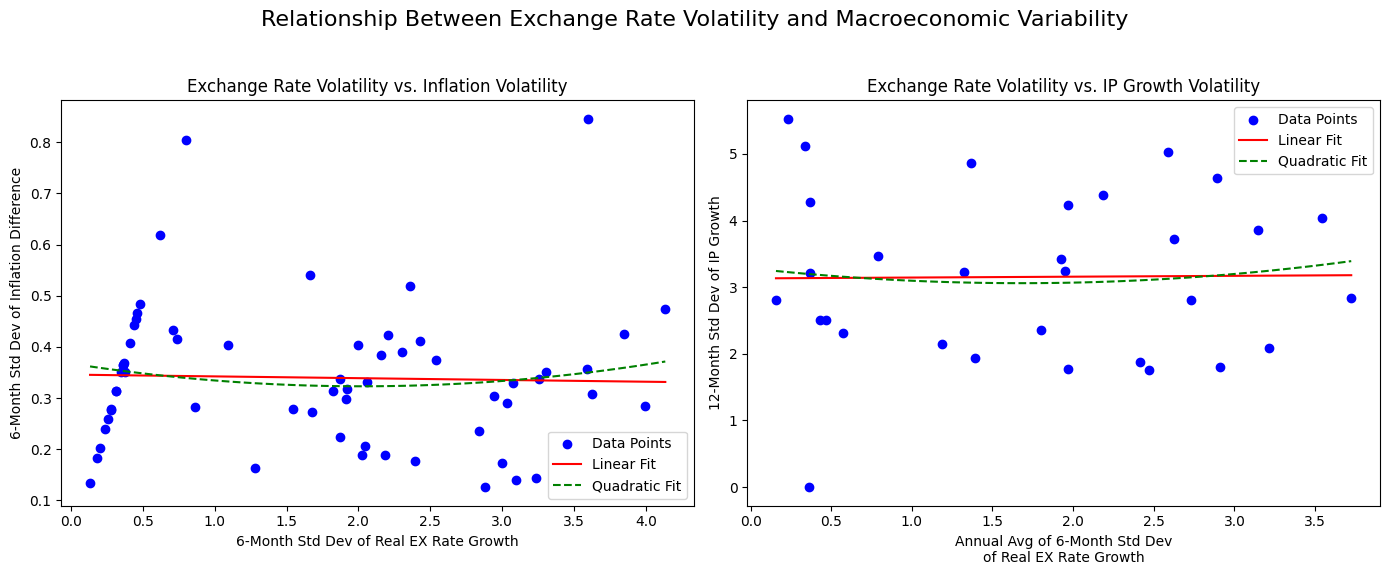

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make a copy of the DataFrame to ensure we are not working on a slice
df = df_germany.copy()

# Ensure the 'Time' column is in datetime format
df.loc[:, 'Time'] = pd.to_datetime(df['Time'])

# Create a 6-month period column using a safe assignment with .loc
# This will label months 1-6 as 'H1' and months 7-12 as 'H2'
df.loc[:, 'Period6'] = df['Time'].dt.year.astype(str) + '-' + df['Time'].dt.month.apply(lambda m: 'H1' if m <= 6 else 'H2')

# -------------------------------------------
# Compute 6-month standard deviations for:
#  - The monthly growth in the real exchange rate
#  - The inflation difference between Germany and the US
# -------------------------------------------
std_6m = df.groupby('Period6')[['German Real EX Rate Growth', 'Inflation Difference']].std().reset_index()

# For manual checking purposes, you can inspect a particular period, e.g., "2024-H1"
manual_check = std_6m[std_6m['Period6'] == '2024-H1']
print("Manual check for period 2024-H1:")
print(manual_check)

# -------------------------------------------
# Compute the 12-month standard deviation for industrial production growth.
# Although the column "German Annual IP Growth" is reported monthly, it reflects 12-month growth.
# Here we compute the standard deviation by resampling by year.
# -------------------------------------------
df_year = df.copy()
df_year.set_index('Time', inplace=True)
std_12m = df_year.resample('Y')['German Annual IP Growth'].std().reset_index()
# Extract the year for merging later and rename the column for clarity.
std_12m['Year'] = std_12m['Time'].dt.year
std_12m.rename(columns={'German Annual IP Growth': 'std_IP_growth'}, inplace=True)

# For the industrial production regression, we need an independent variable at the annual level.
# We aggregate the 6-month std dev of the real exchange rate growth to a yearly measure by averaging.
std_6m['Year'] = std_6m['Period6'].str.split('-').str[0].astype(int)
annual_ex_std = std_6m.groupby('Year')['German Real EX Rate Growth'].mean().reset_index()

# Merge the aggregated exchange rate volatility with the annual std dev of IP growth.
reg_df_ip = pd.merge(annual_ex_std, std_12m[['Year', 'std_IP_growth']], on='Year')

# -------------------------------------------
# Prepare data arrays for regression fits
# Regression 1: 6-month std of inflation difference vs. 6-month std of exchange rate growth
x_infl = std_6m['German Real EX Rate Growth'].values
y_infl = std_6m['Inflation Difference'].values

# Regression 2: 12-month std of industrial production growth vs. annual-averaged 6-month std of exchange rate growth
x_ip = reg_df_ip['German Real EX Rate Growth'].values
y_ip = reg_df_ip['std_IP_growth'].values

# Optionally drop any NaN values (if they exist)
mask_infl = ~np.isnan(x_infl) & ~np.isnan(y_infl)
x_infl = x_infl[mask_infl]
y_infl = y_infl[mask_infl]

mask_ip = ~np.isnan(x_ip) & ~np.isnan(y_ip)
x_ip = x_ip[mask_ip]
y_ip = y_ip[mask_ip]

# Run the regressions using np.polyfit:
# For inflation difference regression
lin_fit_infl = np.polyfit(x_infl, y_infl, 1)
quad_fit_infl = np.polyfit(x_infl, y_infl, 2)

# For industrial production growth regression
lin_fit_ip = np.polyfit(x_ip, y_ip, 1)
quad_fit_ip = np.polyfit(x_ip, y_ip, 2)

# -------------------------------------------
# Plot side-by-side graphs with both linear and quadratic lines
# -------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left graph: 6-month std of inflation difference with exchange rate volatility as independent variable
axs[0].scatter(x_infl, y_infl, color='blue', label='Data Points')
x_vals_infl = np.linspace(x_infl.min(), x_infl.max(), 100)
axs[0].plot(x_vals_infl, np.polyval(lin_fit_infl, x_vals_infl), color='red', label='Linear Fit')
axs[0].plot(x_vals_infl, np.polyval(quad_fit_infl, x_vals_infl), color='green', linestyle='--', label='Quadratic Fit')
axs[0].set_xlabel('6-Month Std Dev of Real EX Rate Growth')
axs[0].set_ylabel('6-Month Std Dev of Inflation Difference')
axs[0].set_title('Exchange Rate Volatility vs. Inflation Volatility')
axs[0].legend()

# Right graph: 12-month std of industrial production growth with annual aggregated exchange rate volatility
axs[1].scatter(x_ip, y_ip, color='blue', label='Data Points')
x_vals_ip = np.linspace(x_ip.min(), x_ip.max(), 100)
axs[1].plot(x_vals_ip, np.polyval(lin_fit_ip, x_vals_ip), color='red', label='Linear Fit')
axs[1].plot(x_vals_ip, np.polyval(quad_fit_ip, x_vals_ip), color='green', linestyle='--', label='Quadratic Fit')
axs[1].set_xlabel('Annual Avg of 6-Month Std Dev\nof Real EX Rate Growth')
axs[1].set_ylabel('12-Month Std Dev of IP Growth')
axs[1].set_title('Exchange Rate Volatility vs. IP Growth Volatility')
axs[1].legend()

fig.suptitle('Relationship Between Exchange Rate Volatility and Macroeconomic Variability', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
